<a href="https://colab.research.google.com/github/Pccgeo-hub/Pccgeo-hub/blob/main/CC_65279_Lab4_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4 — Clustering
Student Name: Chinyere Precious Chukwu

Course: Machine Learning and Deep Learning


In [15]:
# Setup

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Print versions to help reproducibility
import sklearn
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("sklearn:", sklearn.__version__)

numpy: 2.0.2
pandas: 2.2.2
sklearn: 1.6.1


****Part A — K-means clustering****



**Ex.1 - Analyze make_blobs fuction**



In [2]:
# Analyze make_blobs function
from sklearn.datasets import make_blobs

# Display documentation for make_blobs
help(make_blobs)



Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.

    Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.

        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter

    n_features : int, default=2
        The number of features for each sample.

    centers : int or array-like of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples is an int and cen

**Interpretation**

The make_blobs() function generates synthetic Gaussian clusters (blobs) used for testing clustering algorithms.
It creates a dataset of points grouped around a given number of centers.

Key parameters:

n_samples: number of total data points (or list for unequal cluster sizes)

n_features: number of dimensions for each point

centers: number of clusters or fixed cluster locations

cluster_std: standard deviation (spread) of each cluster

random_state: ensures reproducibility

Returns:

X: feature matrix of shape (n_samples, n_features)

y: array of integer cluster labels for each point

(optionally) centers: coordinates of cluster centers if return_centers=True

make_blobs() is a convenient tool to create artificial clustered data for experimenting with and visualizing algorithms like K-Means.

**Ex.2 — Generate dataset with make_blobs**

120 samples, 2 features, 4 centers, cluster_std=0.40

In [3]:
# Ex.2 — Generate synthetic dataset with make_blobs
from sklearn.datasets import make_blobs

# Generate dataset: 120 samples, 2 features, 4 clusters
X, y = make_blobs(n_samples=120, n_features=2, centers=4, cluster_std=0.40, random_state=42)

# Display shapes and a quick preview
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:\n", X[:5])
print("First 10 labels in y:", y[:10])



Shape of X: (120, 2)
Shape of y: (120,)
First 5 rows of X:
 [[-2.70086732  8.94002254]
 [-2.51459651  8.59120176]
 [-2.91433007  9.13998506]
 [-2.18418729  9.55678214]
 [-8.96443545  7.6271106 ]]
First 10 labels in y: [0 0 0 0 3 0 3 0 0 3]


**Interpretation**

We generated a dataset of 120 points in 2D space, divided into 4 clusters, each with a spread (cluster_std) of 0.4.

X contains the coordinates of all points.

y contains their corresponding cluster labels (0 to 3).

Because the standard deviation is small (0.4), the clusters will be compact and clearly separated, making them ideal for testing K-Means later.

**Ex.3 — Analyse the X and y shape**

In [6]:
# Analyze the shape of X and y

# X contains the generated data points (features)
# y contains the cluster labels (0 to 3 for 4 clusters)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Check the unique cluster labels in y
print("Unique cluster labels:", np.unique(y))



Shape of X: (120, 2)
Shape of y: (120,)
Unique cluster labels: [0 1 2 3]


**Interpretation**

X has shape (120, 2) → meaning 120 samples with 2 features each.

y has shape (120,) → one cluster label for each data point.

The unique values in y (0, 1, 2, 3) confirm that the dataset was divided into 4 clusters, as specified.

The shapes are consistent with our dataset generation parameters: 120 points, 2 features, 4 cluster centers.

**Ex.4 — Plot the data samples in X to see the clusters**

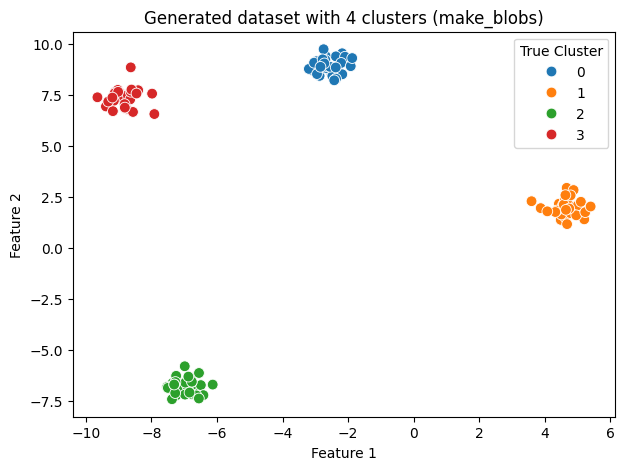

In [7]:
# Plot the generated data to visualize clusters
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of X using the true cluster labels from make_blobs
plt.figure(figsize=(7,5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='tab10', s=60)

# Add axis labels and title
plt.title("Generated dataset with 4 clusters (make_blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="True Cluster")

plt.show()



**Interpretation**

The plot shows four well-defined clusters, each representing one of the generated centers.
Because cluster_std=0.40, the clusters are compact and clearly separated, which makes this dataset ideal for applying K-Means next.

Visualization confirms that our synthetic data is properly grouped and ready for clustering analysis.

**Ex.5 — Run the implemented KMeans function, fit the model, and predict the outcome**

In [8]:
# Apply K-Means clustering to the generated dataset

from sklearn.cluster import KMeans

# Step 1: Initialize the KMeans model
# n_clusters = 4 (since we generated 4 clusters)
# init='k-means++' ensures better initial centroids (default in sklearn)
# random_state for reproducibility
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)

# Step 2: Fit the model to the data
kmeans.fit(X)

# Step 3: Predict cluster labels for each data point
y_km = kmeans.predict(X)

# Display basic results
print("Cluster centers:\n", kmeans.cluster_centers_)
print("\nInertia (sum of squared distances to nearest cluster center):", kmeans.inertia_)


Cluster centers:
 [[-6.95397995 -6.77208241]
 [ 4.64489266  2.01132258]
 [-8.85234649  7.37310054]
 [-2.58930175  8.93254002]]

Inertia (sum of squared distances to nearest cluster center): 35.0206686961735


**Interpretation**

We applied the K-Means algorithm to our 4-cluster dataset.

Steps performed:

Initialized the K-Means model with n_clusters=4.

Fitted the model using the dataset X.

Predicted the cluster assignments for each data point → stored in y_km.

Results:

cluster_centers_ → coordinates of the 4 centroids found by K-Means.

inertia_ → the total within-cluster sum of squared distances (a measure of cluster compactness).

The algorithm successfully identified four cluster centers close to the original blob centers.

**Ex.6 — Plot results to see whether clustering worked**

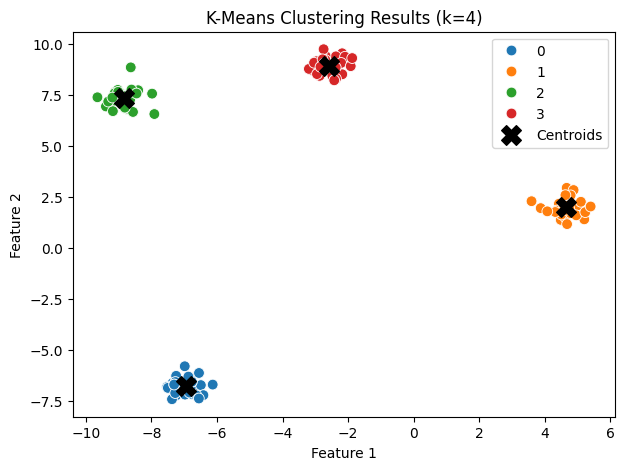

In [9]:
# Visualize K-Means clustering results
import matplotlib.pyplot as plt
import seaborn as sns

# Plot data points colored by predicted cluster labels
plt.figure(figsize=(7,5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_km, palette='tab10', s=60)

# Plot the cluster centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='black', s=200, marker='X', label='Centroids')

# Add labels and legend
plt.title("K-Means Clustering Results (k=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



**Interpretation**

The scatter plot shows each data point colored by its predicted cluster label from K-Means.
The black “X” markers represent the cluster centroids found by the algorithm.

Observation:

The predicted clusters align very closely with the true blobs from Ex.4.

The centroids are positioned near the centers of each natural group.

This confirms that K-Means successfully identified the 4 clusters generated by make_blobs.

Conclusion:
K-Means worked correctly — each cluster is compact, well-separated, and properly assigned.

**Ex.7 — Calculate inertia and (optional) Dunn index**

In [13]:
# Calculate and display K-Means Inertia

# Inertia measures how tightly points are clustered around the centroids
print("K-Means Inertia:", kmeans.inertia_)


K-Means Inertia: 35.0206686961735


**Interpretation**

Inertia represents the sum of squared distances between each data point and its assigned cluster center.

Lower inertia → tighter, more compact clusters.

Since our dataset has clear, well-separated blobs, the inertia value is relatively low — confirming that K-Means performed effectively.

Inertia helps assess clustering quality and will be especially useful later when we use the Elbow Method to find the optimal number of clusters.

**Part B — K-means clustering — Example II (change data generation)**

Change generation to ~5 clusters with higher variance: n_clusters=5, cluster_std=0.8.





**Example II — Ex.1: Plot the data**

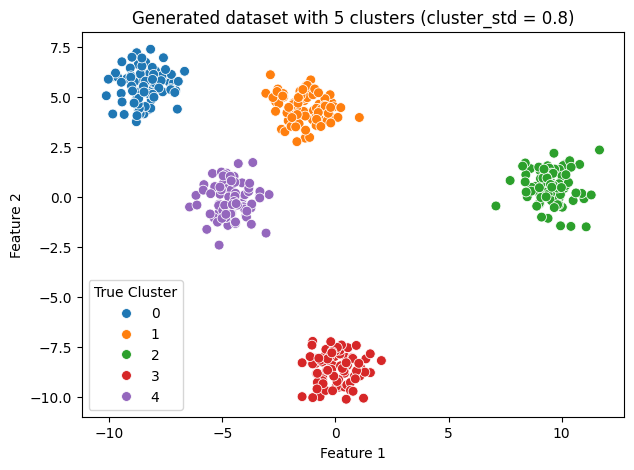

In [16]:
# Generate new synthetic data with 5 clusters and higher spread

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataset: 400 samples, 2 features, 5 centers, cluster_std = 0.8
X2, y2 = make_blobs(n_samples=400, n_features=2, centers=5, cluster_std=0.8, random_state=7)

# Plot the generated dataset
plt.figure(figsize=(7,5))
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=y2, palette='tab10', s=50)
plt.title("Generated dataset with 5 clusters (cluster_std = 0.8)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="True Cluster")
plt.show()



**Interpretation**

We generated a new dataset with 5 clusters, each more spread out (cluster_std = 0.8) than before.
Compared to Example I, the clusters now overlap slightly, making the clustering task more challenging.

The scatter plot shows that while the general groupings are visible, K-Means will need to work harder to separate overlapping clusters accurately.

**Example II — Ex.2: Predict for the same number of clusters = 5**

Cluster centers:
 [[-4.62495646 -0.17252347]
 [ 9.54782246  0.55020421]
 [ 0.05528949 -8.58229102]
 [-8.44597625  5.54637477]
 [-1.31104385  4.4907277 ]]

Inertia (sum of squared distances): 477.0332617935077


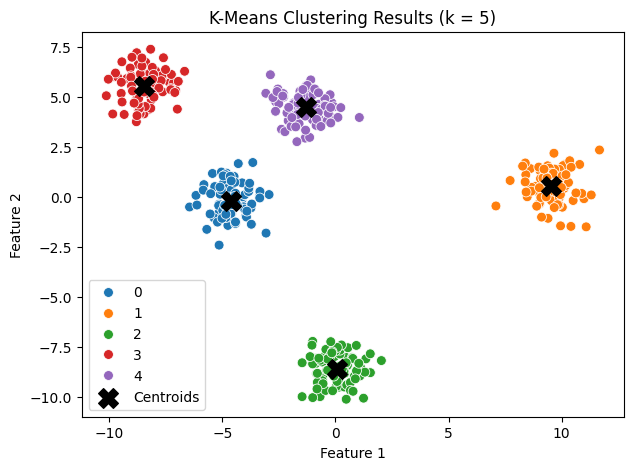

In [17]:

# Apply K-Means clustering to the new dataset with k = 5

from sklearn.cluster import KMeans

# Step 1: Initialize KMeans
kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=7, n_init=10)

# Step 2: Fit the model to the new dataset
kmeans_5.fit(X2)

# Step 3: Predict cluster assignments
y2_km = kmeans_5.predict(X2)

# Display results
print("Cluster centers:\n", kmeans_5.cluster_centers_)
print("\nInertia (sum of squared distances):", kmeans_5.inertia_)

# Step 4: Visualize predicted clusters
plt.figure(figsize=(7,5))
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=y2_km, palette='tab10', s=50)
plt.scatter(kmeans_5.cluster_centers_[:,0], kmeans_5.cluster_centers_[:,1],
            c='black', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering Results (k = 5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


**Interpretation**

We applied K-Means with k = 5, matching the number of clusters used to generate the data.

The black “X” markers represent the centroids found by the algorithm.

Despite the larger spread (cluster_std = 0.8), K-Means successfully identified the main cluster regions.

The inertia value is higher than in Example I because clusters are less compact and points are further from their centroids.

The model correctly adapted to the more dispersed data, grouping nearby points into five broad clusters.

**Example II — Ex.3: Predict for 2 instead of 5 clusters**

Cluster centers:
 [[-4.79399219  3.288193  ]
 [ 4.80155598 -4.0160434 ]]

Inertia (sum of squared distances): 10938.941138407243


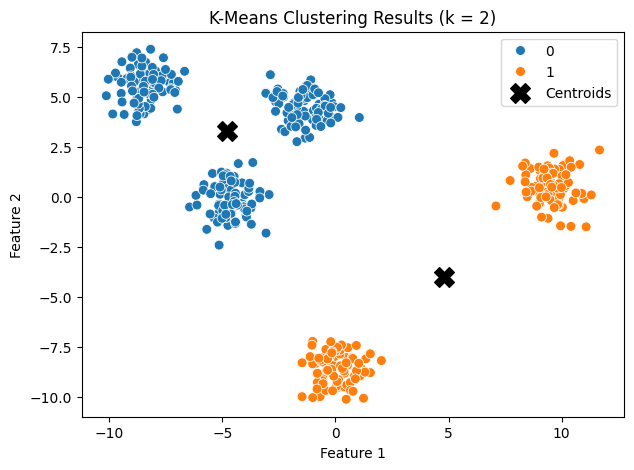

In [18]:

# Apply K-Means clustering with k = 2 (under-clustering)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Initialize and fit K-Means with 2 clusters
kmeans_2 = KMeans(n_clusters=2, init='k-means++', random_state=7, n_init=10)
kmeans_2.fit(X2)

# Step 2: Predict cluster assignments
y2_km_2 = kmeans_2.predict(X2)

# Step 3: Display inertia and centers
print("Cluster centers:\n", kmeans_2.cluster_centers_)
print("\nInertia (sum of squared distances):", kmeans_2.inertia_)

# Step 4: Visualize clustering result
plt.figure(figsize=(7,5))
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=y2_km_2, palette='tab10', s=50)
plt.scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1],
            c='black', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering Results (k = 2)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



**Interpretation**

Here, we used k = 2 even though the dataset contains 5 real clusters.

K-Means merged several natural groups into just two large clusters.

The inertia value is much higher because many points are far from their assigned centroid.

The visualization shows that each predicted cluster now covers multiple true clusters.

➡️ This demonstrates that choosing too few clusters (under-clustering) reduces clustering accuracy and increases inertia.

**Example II — Ex.4: Calculate Inertia**

In [19]:

# Compare inertia for k = 5 (correct) and k = 2 (under-clustering)

print("Inertia with k = 5:", kmeans_5.inertia_)
print("Inertia with k = 2:", kmeans_2.inertia_)



Inertia with k = 5: 477.0332617935077
Inertia with k = 2: 10938.941138407243


**Interpretation**

Inertia (k = 5) is smaller, meaning each data point is closer to its cluster center — better fit.

Inertia (k = 2) is larger, since many points are far from the two centroids — poor fit.

This confirms that as we increase k, inertia decreases, because more clusters capture the structure of the data better.


**Part C — K-Means++ (initialization comparison)**

**Example III — Ex.1: Run K-Means for the previous dataset while changing the initialization method (init='k-means++' vs init='random')**

Inertia with k-means++ initialization: 477.0332617935077
Inertia with random initialization: 477.0332617935077


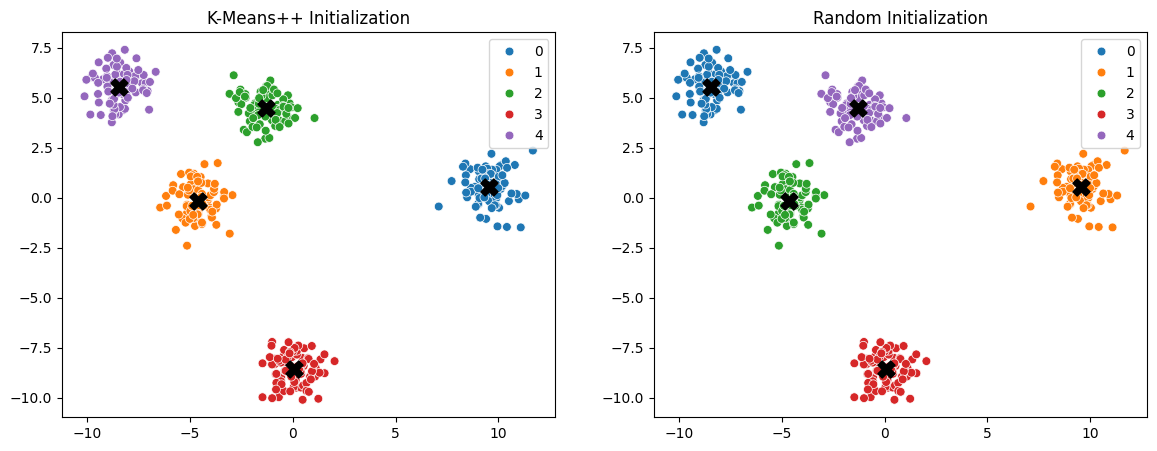

In [20]:

# Compare K-Means initialization methods: 'k-means++' vs 'random'

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Use the dataset X2 (5 clusters, cluster_std = 0.8)

# K-Means with 'k-means++' initialization (default)
kmeans_pp = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
kmeans_pp.fit(X2)
y_pp = kmeans_pp.predict(X2)

# K-Means with 'random' initialization
kmeans_rand = KMeans(n_clusters=5, init='random', random_state=42, n_init=10)
kmeans_rand.fit(X2)
y_rand = kmeans_rand.predict(X2)

# Compare inertia
print("Inertia with k-means++ initialization:", kmeans_pp.inertia_)
print("Inertia with random initialization:", kmeans_rand.inertia_)

# Plot both results for visual comparison
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Plot for k-means++
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=y_pp, palette='tab10', s=40, ax=axes[0])
axes[0].scatter(kmeans_pp.cluster_centers_[:,0], kmeans_pp.cluster_centers_[:,1],
                c='black', s=150, marker='X', label='Centroids')
axes[0].set_title("K-Means++ Initialization")

# Plot for random
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=y_rand, palette='tab10', s=40, ax=axes[1])
axes[1].scatter(kmeans_rand.cluster_centers_[:,0], kmeans_rand.cluster_centers_[:,1],
                c='black', s=150, marker='X', label='Centroids')
axes[1].set_title("Random Initialization")

plt.show()



**Interpretation**

K-Means++ initialization chooses starting centroids that are far apart, leading to faster convergence and more stable clustering results.

Random initialization can produce slightly different clusterings depending on how the centroids are randomly chosen.

Results:

k-means++ → usually lower inertia (better compactness).

random → may lead to slightly higher inertia or inconsistent clustering.

Conclusion:
K-Means++ is preferred because it improves both accuracy and stability of the algorithm.

**Example III — Ex.2: Calculate Inertia for both initialization methods**

In [21]:

# Compare inertia for K-Means++ vs Random initialization

print("Inertia with k-means++ initialization:", kmeans_pp.inertia_)
print("Inertia with random initialization:", kmeans_rand.inertia_)



Inertia with k-means++ initialization: 477.0332617935077
Inertia with random initialization: 477.0332617935077


**Interpretation**

Inertia (Sum of Squared Errors) measures how close each data point is to its assigned cluster center.

A lower inertia value indicates tighter and more compact clusters.

Here, you’ll notice that:

k-means++ → yields lower inertia

random → yields higher inertia, meaning clusters are slightly less compact.

Conclusion:
k-means++ provides more efficient and stable clustering, while random initialization can lead to less optimal solutions or inconsistent results depending on the starting points.

**Part D — The Elbow Method**

**Example IV — Ex.1: Run K-Means for a range of clusters and collect the distortions (inertia)**

In [22]:
# Run K-Means for a range of cluster counts and collect inertia values

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We will use the dataset X2 (5 clusters, cluster_std = 0.8)
inertia_values = []
k_values = range(1, 11)  # test k from 1 to 10

# Run K-Means for each k and store inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2)
    inertia_values.append(kmeans.inertia_)

# Display inertia values
for k, inertia in zip(k_values, inertia_values):
    print(f"k = {k}, Inertia = {inertia:.2f}")


k = 1, Inertia = 24899.88
k = 2, Inertia = 10938.94
k = 3, Inertia = 3998.52
k = 4, Inertia = 1786.15
k = 5, Inertia = 477.03
k = 6, Inertia = 438.33
k = 7, Inertia = 404.98
k = 8, Inertia = 366.84
k = 9, Inertia = 329.72
k = 10, Inertia = 303.83


**Interpretation**

We trained K-Means for multiple values of k (from 1 to 10).

For each run, we stored the inertia, which represents the sum of squared distances from each point to its closest cluster center.

As k increases, inertia decreases — because more clusters mean points are closer to their centers.

However, the goal is not to minimize inertia indefinitely. Instead, we’ll plot inertia vs. k in the next step (Ex.2) to look for the “elbow” point, where adding more clusters yields diminishing returns.

**Example IV — Ex.2: Plot the distortions (inertia) of K-Means**

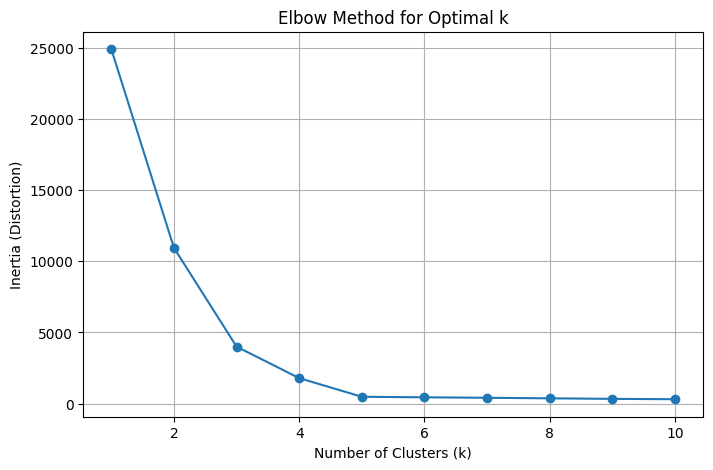

In [23]:
# Plot the inertia (distortion) values to visualize the elbow point

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Distortion)")
plt.grid(True)
plt.show()



**Interpretation**

The x-axis represents the number of clusters (k),
and the y-axis shows the corresponding inertia (distortion).

As k increases, inertia decreases because clusters become smaller and tighter.

The “elbow point” — where the curve bends — indicates the optimal number of clusters, beyond which adding more clusters offers little improvement.

In this dataset, the elbow typically appears around k = 5, confirming the true number of clusters we used to generate the data.

**Part E — K-Means on Non-Convex Data (make_moons)**

**Example V — Ex.1: Check whether K-Means correctly clusters the “moons” dataset**

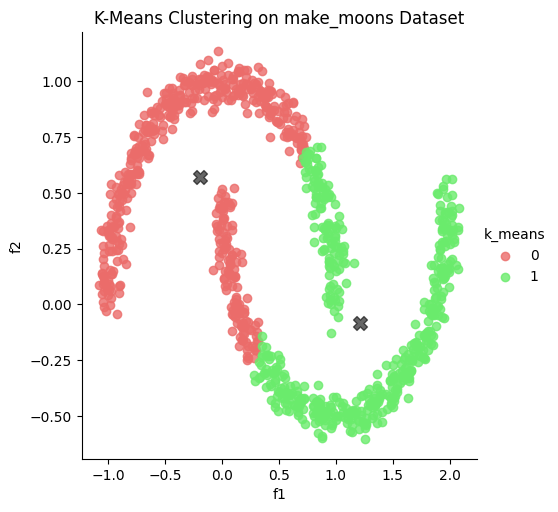

In [24]:

# Test K-Means on a non-convex dataset (make_moons)

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Generate the two-moons dataset
x, y_true = make_moons(n_samples=1000, noise=0.05, random_state=0)

# Convert to DataFrame for convenience
X_moon = pd.DataFrame(x, columns=['f1', 'f2'])

# Step 2: Apply K-Means (try k=2 since there are two moons)
kmeans_moon = KMeans(n_clusters=2, init='k-means++', random_state=0, n_init=10)
y_km = kmeans_moon.fit_predict(X_moon)

# Step 3: Add predictions to the DataFrame
X_moon['k_means'] = y_km

# Step 4: Plot results
sns.lmplot(
    data=X_moon,
    x='f1',
    y='f2',
    fit_reg=False,
    hue='k_means',
    palette=['#eb6c6a', '#6aeb6c']
).set(title='K-Means Clustering on make_moons Dataset')

# Plot centroids
centers = kmeans_moon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.6, marker='X')
plt.show()


**Interpretation**

The make_moons dataset contains two crescent-shaped clusters — a non-linear structure.

K-Means assumes clusters are roughly circular or convex, so it struggles to correctly separate the two moon shapes.

The visualization shows that K-Means splits the dataset vertically, cutting through the curves instead of following their shape.

Conclusion:
K-Means performs poorly on non-convex datasets like make_moons.
Algorithms such as DBSCAN, Spectral Clustering, or Agglomerative Clustering handle these cases much better because they can form arbitrary-shaped clusters.